In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
feature_vector_length = 784
num_classes = 10


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [5]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 50)                17550     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 292,810
Trainable params: 292,810
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
                    epochs=10, 
                    batch_size=250, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 13s 40ms/step - loss: 0.3963 - accuracy: 0.8841 - val_loss: 0.1726 - val_accuracy: 0.9517
Epoch 2/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1446 - accuracy: 0.9583 - val_loss: 0.1257 - val_accuracy: 0.9641
Epoch 3/10
192/192 [==============================] - 6s 34ms/step - loss: 0.0996 - accuracy: 0.9707 - val_loss: 0.1087 - val_accuracy: 0.9672
Epoch 4/10
192/192 [==============================] - 6s 34ms/step - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.0959 - val_accuracy: 0.9724
Epoch 5/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0553 - accuracy: 0.9842 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 6/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0990 - val_accuracy: 0.9707
Epoch 7/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0334 - accuracy: 0.9907 - val_loss: 0.0900 - val_accuracy: 0.974

In [7]:
test_results = model.evaluate(X_test, Y_test, verbose=1)

print(f'\nTest results - Loss: {test_results[0]:.4f} - Accuracy: {test_results[1]*100:.2f}%')

313/313 [==============================] - 6s 13ms/step - loss: 0.0769 - accuracy: 0.9784

Test results - Loss: 0.0769 - Accuracy: 97.84%


1/1 [==============================] - 0s 473ms/step

Visualizing first 5 predictions:


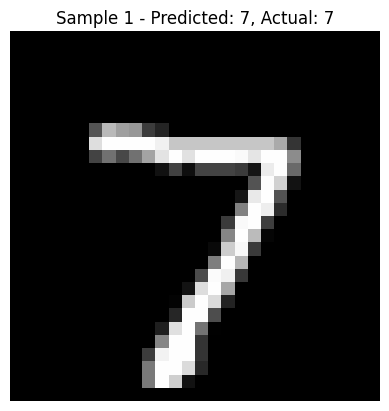

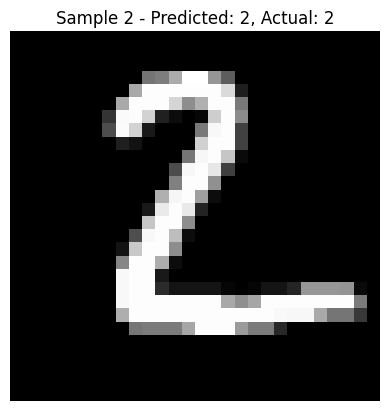

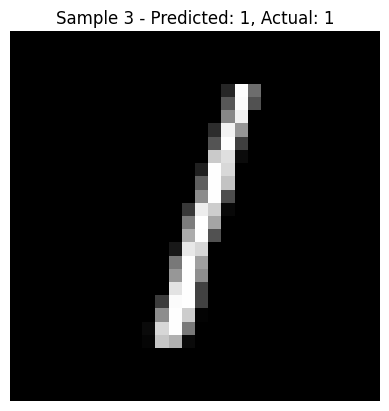

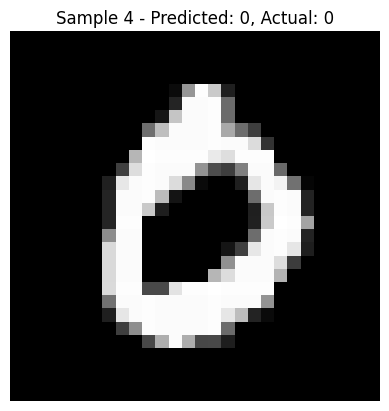

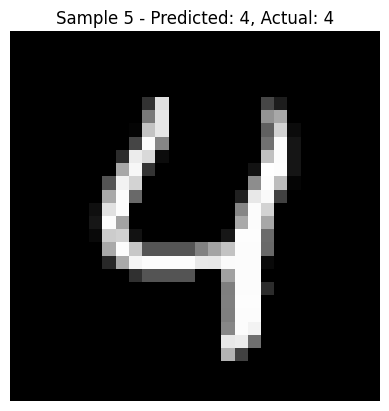

In [8]:

predictions = model.predict(X_test[:5])


predicted_classes = np.argmax(predictions, axis=1)


true_classes = np.argmax(Y_test[:5], axis=1)


print("\nVisualizing first 5 predictions:")
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()